<a href="https://colab.research.google.com/github/tripathiosho/ImportantNotebooks/blob/main/Spam_or_Ham.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline


In [ ]:
!gdown 1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8


Downloading...
From: https://drive.google.com/uc?id=1d4VFxFxPqBpKoUuH51PQ8PYrFBmPCnH8
To: /content/spam_clean.csv
100% 484k/484k [00:00<00:00, 41.0MB/s]


In [ ]:
df = pd.read_csv('spam_clean.csv', encoding='latin-1')
df.head()

,type,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df['type'].value_counts()

,count
type,
ham,4825
spam,747


<Axes: xlabel='type'>

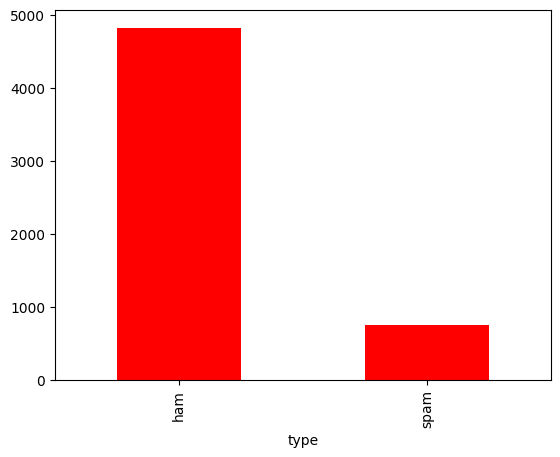

In [ ]:
df['type'].value_counts().plot(kind='bar', color='red')

In [ ]:
import nltk, re

In [ ]:
nltk.download('punkt_tab')
nltk.download('stopwords')
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
nltk.word_tokenize('Hello World!')

['Hello', 'World', '!']

In [ ]:
nltk.word_tokenize('HelloWorld!')

['HelloWorld', '!']

In [ ]:
df['tokenised']= df['message'].apply(lambda x: nltk.word_tokenize(x))

In [ ]:
df

,type,message,tokenised
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,..."


In [ ]:
df['lower']= df['tokenised'].apply(lambda x: [i.lower() for i in x])

In [ ]:
df

,type,message,tokenised,lower
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, goes, to, usf, ,,..."
...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]","[will, ì_, b, going, to, esplanade, fr, home, ?]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[pity, ,, *, was, in, mood, for, that, ., so, ..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,..."


In [ ]:
clean_text = re.sub(r"[!\"#$%&'()*+,\-./:;<=>?@\[\\\]^_`{|}~]", "", df['lower'] )


TypeError: expected string or bytes-like object, got 'Series'

In [ ]:
df['lower_wo_special']= df['lower'].apply(lambda x : [re.sub(r"[!\"#$%&'()*+,\-./:;<=>?@\[\\\]^_`{|}~]", '', i ) for i in x] )

In [ ]:
df

,type,message,tokenised,lower,lower_wo_special
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, , crazy, , availabl..."
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, , joking, wif, u, oni, ]"
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, , u, c, already,..."
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, nt, think, he, goes, to, usf, , h..."
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,..."
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]","[will, ì_, b, going, to, esplanade, fr, home, ?]","[will, ì, b, going, to, esplanade, fr, home, ]"
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, , , was, in, mood, for, that, , so, , a..."
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[the, guy, did, some, bitching, but, i, acted,..."


In [ ]:
def cleaned_text(s):
  cleaned_s = ""
  word=  nltk.word_tokenize(s)
  for i in word:
    c_word= i.lower()
    c_word= re.sub(r"[!\"#$%&'()*+,\-./:;<=>?@\[\\\]^_`{|}~]", '', c_word )
    if c_word !='' and c_word not in stopwords.words('english'):
      cleaned_s= cleaned_s + ' ' + c_word #appending processed word to new list
  return cleaned_s




In [ ]:
df['cleaned_text']= df['message'].apply(cleaned_text)

In [ ]:
df

,type,message,tokenised,lower,lower_wo_special,cleaned_text
0,ham,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...","[go, until, jurong, point, ,, crazy, .., avail...","[go, until, jurong, point, , crazy, , availabl...",go jurong point crazy available bugis n great...
1,ham,Ok lar... Joking wif u oni...,"[Ok, lar, ..., Joking, wif, u, oni, ...]","[ok, lar, ..., joking, wif, u, oni, ...]","[ok, lar, , joking, wif, u, oni, ]",ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,"[Free, entry, in, 2, a, wkly, comp, to, win, F...","[free, entry, in, 2, a, wkly, comp, to, win, f...","[free, entry, in, 2, a, wkly, comp, to, win, f...",free entry 2 wkly comp win fa cup final tkts ...
3,ham,U dun say so early hor... U c already then say...,"[U, dun, say, so, early, hor, ..., U, c, alrea...","[u, dun, say, so, early, hor, ..., u, c, alrea...","[u, dun, say, so, early, hor, , u, c, already,...",u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...","[Nah, I, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, n't, think, he, goes, to, usf, ,,...","[nah, i, do, nt, think, he, goes, to, usf, , h...",nah nt think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,"[This, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...","[this, is, the, 2nd, time, we, have, tried, 2,...",2nd time tried 2 contact u u å£750 pound priz...
5568,ham,Will Ì_ b going to esplanade fr home?,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]","[will, ì_, b, going, to, esplanade, fr, home, ?]","[will, ì, b, going, to, esplanade, fr, home, ]",ì b going esplanade fr home
5569,ham,"Pity, * was in mood for that. So...any other s...","[Pity, ,, *, was, in, mood, for, that, ., So, ...","[pity, ,, *, was, in, mood, for, that, ., so, ...","[pity, , , was, in, mood, for, that, , so, , a...",pity mood suggestions
5570,ham,The guy did some bitching but I acted like i'd...,"[The, guy, did, some, bitching, but, I, acted,...","[the, guy, did, some, bitching, but, i, acted,...","[the, guy, did, some, bitching, but, i, acted,...",guy bitching acted like interested buying som...


In [ ]:
ham = df[df['type']=='ham']
spam = df[df['type']=='spam']

In [ ]:
ham = ham['cleaned_text']

In [ ]:
ham

,cleaned_text
0,go jurong point crazy available bugis n great...
1,ok lar joking wif u oni
3,u dun say early hor u c already say
4,nah nt think goes usf lives around though
6,even brother like speak treat like aids patent
...,...
5565,huh lei
5568,ì b going esplanade fr home
5569,pity mood suggestions
5570,guy bitching acted like interested buying som...


In [ ]:
ham = " ".join(ham)

In [ ]:
ham #bag of words in non spam category #vocabulary of words in non spam category

' go jurong point crazy available bugis n great world la e buffet cine got amore wat  ok lar joking wif u oni  u dun say early hor u c already say  nah nt think goes usf lives around though  even brother like speak treat like aids patent  per request melle melle oru minnaminunginte nurungu vettam set callertune callers press 9 copy friends callertune  gon na home soon nt want talk stuff anymore tonight k cried enough today  searching right words thank breather promise wont take help granted fulfil promise wonderful blessing times  date sunday  oh k watching  eh u remember 2 spell name yes v naughty make v wet  fine thatåõs way u feel thatåõs way gota b  seriously spell name  i\x89û÷m going try 2 months ha ha joking  ì pay first lar da stock comin  aft finish lunch go str lor ard 3 smth lor u finish ur lunch already  ffffffffff alright way meet sooner  forced eat slice really hungry tho sucks mark getting worried knows sick turn pizza lol  lol always convincing  catch bus frying egg mak

In [ ]:
ham= ham.split() #list of words --> vocabulary
ham

['go',
 'jurong',
 'point',
 'crazy',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'cine',
 'got',
 'amore',
 'wat',
 'ok',
 'lar',
 'joking',
 'wif',
 'u',
 'oni',
 'u',
 'dun',
 'say',
 'early',
 'hor',
 'u',
 'c',
 'already',
 'say',
 'nah',
 'nt',
 'think',
 'goes',
 'usf',
 'lives',
 'around',
 'though',
 'even',
 'brother',
 'like',
 'speak',
 'treat',
 'like',
 'aids',
 'patent',
 'per',
 'request',
 'melle',
 'melle',
 'oru',
 'minnaminunginte',
 'nurungu',
 'vettam',
 'set',
 'callertune',
 'callers',
 'press',
 '9',
 'copy',
 'friends',
 'callertune',
 'gon',
 'na',
 'home',
 'soon',
 'nt',
 'want',
 'talk',
 'stuff',
 'anymore',
 'tonight',
 'k',
 'cried',
 'enough',
 'today',
 'searching',
 'right',
 'words',
 'thank',
 'breather',
 'promise',
 'wont',
 'take',
 'help',
 'granted',
 'fulfil',
 'promise',
 'wonderful',
 'blessing',
 'times',
 'date',
 'sunday',
 'oh',
 'k',
 'watching',
 'eh',
 'u',
 'remember',
 '2',
 'spell',
 'name',
 'yes',


In [ ]:
from collections import Counter

In [ ]:
counter_ham= Counter(ham) #dict with occurrances

In [ ]:
counter_ham

Counter({'go': 248,
         'jurong': 1,
         'point': 13,
         'crazy': 10,
         'available': 14,
         'bugis': 7,
         'n': 139,
         'great': 103,
         'world': 37,
         'la': 7,
         'e': 78,
         'buffet': 2,
         'cine': 7,
         'got': 244,
         'amore': 1,
         'wat': 106,
         'ok': 279,
         'lar': 38,
         'joking': 6,
         'wif': 27,
         'u': 1004,
         'oni': 4,
         'dun': 55,
         'say': 91,
         'early': 33,
         'hor': 2,
         'c': 60,
         'already': 90,
         'nah': 10,
         'nt': 360,
         'think': 128,
         'goes': 26,
         'usf': 11,
         'lives': 4,
         'around': 59,
         'though': 26,
         'even': 56,
         'brother': 18,
         'like': 231,
         'speak': 23,
         'treat': 16,
         'aids': 1,
         'patent': 1,
         'per': 12,
         'request': 7,
         'melle': 6,
         'oru': 4,
         'm